<h1><center>The Migrants Weep.</center></h1>

# What is the Missing Migrants Project?

In October 2013, the Italian island of Lampedusa saw two shipwrecks that claimed the lives of 368 people.A further 360 deaths were later reported. The tragedy triggered a response from the International Organisation for Migrants to record incidents in which migrants, refugees and asylum-seekers alike have died in the process of migrating to an international destination.

This response has taken the shape of the Missing Migrants Project which maintains a database of all reported incidents of deaths and disappearances of people in the process of migrating to an international destination. The aim of the Missing Migrants Project is to "save lives and establish coordinated international efforts on missing migrants."

The International Organisation for Migrants has recorded over 40,000 deaths among migrants during unsafe migration journeys since 2014, and terms these events as a massive political mis-step in modern times. Naturally, the IOM believes that the data can be analysed to help inform policies to alleviate the pains of the families of those migrants who have gone missing and to put a full stop to future deaths.

# The dataset's design.

| Column Name| Description | 
| --- | --- |
| Main ID|Identifies each unique entry in the dataset.|
| Region|The region where the incident took place.|
|Incident Date|Estimated date of death.|
|Reported Month| The month in which the incident took place.|
|Number Dead|The total number of people confirmed dead in one incident.|
|Total Number of Dead and Missing| We assume that the missing are dead until proven otherwise.|
|Cause of Death| The circumstances of the event that produced the fatal injury.|
|Location of Death | Location where the body is found.|
|Information Source | Name of source of information for each incident.|
|Coordinates| Coordinates for the place where the deaths occured.|
|Migration Route| Name of the migrant route on which the incident occurred.|










Before diving into any analysis, it is important to understand what the data talks about and where it comes from.

Each entry in the dataset represents an incident that has claimed the lives of migrants en route to their destination. For the sake of this analysis, what's important to me is the Region where these incidents have occurred, how many have died per incident, how many are missing, the general location where these incidents have taken place within those regions and lastly, the route that the migrants were taking.

Asking the right questions can lead to better policies and preventive measures.

Off the top of my head, I can think of asking the following contexts to explore:
 - Which region has seen the most deaths? Is there a reason for it?
 - What are the causes of deaths? What is the prime migrant killer in these cases?
 - What route were they taking? Are these routes travelled multiple times? Which is the most dangerous?
 
We'll take these questions as our starting point.
 

# Preparations and processings.
Since the data has a lot of missing values, and columns unnecessary for our particular analysis, we'll do a bit of data cleaning here.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# pulling and concatenating files into one big dataset
files = os.listdir('./migrantdata/')

year_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./migrantdata/'+file, thousands=',')
    year_data = pd.concat([year_data, df])

In [3]:
# cleaning the new dataset a bit
year_data = year_data.sort_values(["Year"], ascending = True)
year_data = year_data.rename(columns={'Migrantion route':'Migration route'})
year_data = year_data.drop(columns=['Location of death', 'Information Source', 'Incident Date','Number Dead', 'Minimum Estimated Number of Missing', 'Number of Survivors', 'Number of Females', 'Number of Males', 'Number of Children', 'URL', 'UNSD Geographical Grouping', 'Source Quality', 'Main ID', 'Incident ID'])


In [4]:
# processing the dataset a bit
data = year_data.copy()

data['Latitude'], data['Longitude'] = data['Coordinates'].str.split(', ').str

data.Latitude = data.Latitude.astype(float)
data.Longitude = data.Longitude.astype(float)

locations = data[['Latitude', 'Longitude', 'Total Number of Dead and Missing', 'Region']]
basemap = folium.Map(location = [locations['Latitude'].mean(), locations['Longitude'].mean()], zoom_start=3)
HeatMap(data=locations.groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(),min_opacity=0.6, radius=8, max_zoom=13).add_to(basemap)

dead_by_region = data.groupby('Region')['Total Number of Dead and Missing'].sum().reset_index()
dead_by_region.sort_values(by=['Total Number of Dead and Missing'], inplace=True, ascending=False)

def causeofdeath(d):
    # Health Conditions
    d.loc[d['Cause of Death'].str.contains('Sickness|sickness'), 'Cause of Death'] = 'Health Conditions'
    # Harsh Conditions
    d.loc[d['Cause of Death'].str.contains('Harsh | harsh'), 'Cause of Death'] = 'Harsh Conditions'
    # Unknown
    d.loc[d['Cause of Death'].str.contains('unknown|Unknown'), 'Cause of Death'] = 'Unknown'
    
    # Drowning
    d.loc[d['Cause of Death'].str.contains('Drowning|drowning|Pulmonary|respiratory|lung|bronchial|pneumonia|Pneumonia'), 'Cause of Death'] = 'Drowning'
    
    # Vehicle Accident
    d.loc[d['Cause of Death'].str.contains('train|bus|vehicle|truck|boat|car|road|van|plane|collision'), 'Cause of Death'] = 'Vehicle Accident'
    d.loc[d['Cause of Death'].str.contains('Train|Bus|Vehicle|Truck|Boat|Car|Road|Van|Plane|Collision'), 'Cause of Death'] = 'Vehicle Accident'
    # Murder
    d.loc[d['Cause of Death'].str.contains('murder|stab|shot|violent|blunt force| violence|beat-up|fight|murdered|death'), 'Cause of Death'] = 'Murder and Violence'
    d.loc[d['Cause of Death'].str.contains('Murdered|Stab|Shot|Violent|Blunt|Force|Violence|Beat-up|Fight|Murdered|Death'), 'Cause of Death'] = 'Murder and Violence'
    d.loc[d['Cause of Death'].str.contains('Hanging|Apache|mortar|landmine|Rape|Gassed'), 'Cause of Death'] = 'Murder and Violence'
  
    
# applying the function
causeofdeath(data)

# Our dataset.

In [5]:
data.head(5)

,Region,Year,Reported Month,Total Number of Dead and Missing,Cause of Death,Coordinates,Migration route,Latitude,Longitude
0,North America,2014,January,1,Unknown,"31.650259, -110.366453",US-Mexico border crossing,31.650259,-110.366453
207,Mediterranean,2014,September,500,Drowning,"33.9069, 14.4141",Central Mediterranean,33.906900,14.414100
206,North America,2014,September,1,Harsh Conditions,"32.6185, -112.33998",US-Mexico border crossing,32.618500,-112.339980
205,North America,2014,September,1,Drowning,"26.1850517, -98.3798819",US-Mexico border crossing,26.185052,-98.379882
204,North America,2014,September,1,Unknown,"32.35267, -113.163509",US-Mexico border crossing,32.352670,-113.163509


# Analysis

In [6]:
# cause of death in the Mediterranean and Northern African regions
cause_of_death = data[(data['Region']=='Mediterranean') | (data['Region']=='Northern Africa')].groupby('Cause of Death')['Total Number of Dead and Missing'].sum().reset_index()
cause_of_death.sort_values(by=['Total Number of Dead and Missing'], inplace=True, ascending=False)

# Number of incidents reported per year
yearwise_incident = data[(data['Region']=='Mediterranean') | (data['Region']=='Northern Africa')]['Year'].value_counts().reset_index()
yearwise_incident.rename(columns={'index':'Year', 'Year':'Number of Incidents'}, inplace=True)

# Number of incidents reported per region
regionwise_incident = data[(data['Region']=='Mediterranean') | (data['Region']=='Northern Africa')]['Migration route'].value_counts().reset_index()
regionwise_incident.rename(columns={'index':'Migration route', 'Migration route':'Number of Incidents'}, inplace=True)

# Number of dead and missing per region
regionwise_deaths = data[(data['Region']=='Mediterranean') | (data['Region']=='Northern Africa')].groupby('Migration route')['Total Number of Dead and Missing'].sum().reset_index()
regionwise_deaths.sort_values(by=['Total Number of Dead and Missing'], inplace=True, ascending=False)

### The Mediterranean claims the most victims.

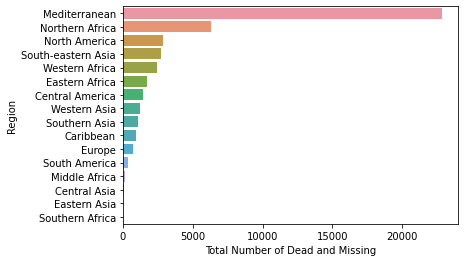

In [7]:
sns.barplot(data=dead_by_region, y='Region', x='Total Number of Dead and Missing')
sns.set(rc={'figure.figsize':(15, 6)})

<h5><center>Dead and missing per region</center></h5>

In [ ]:
basemap

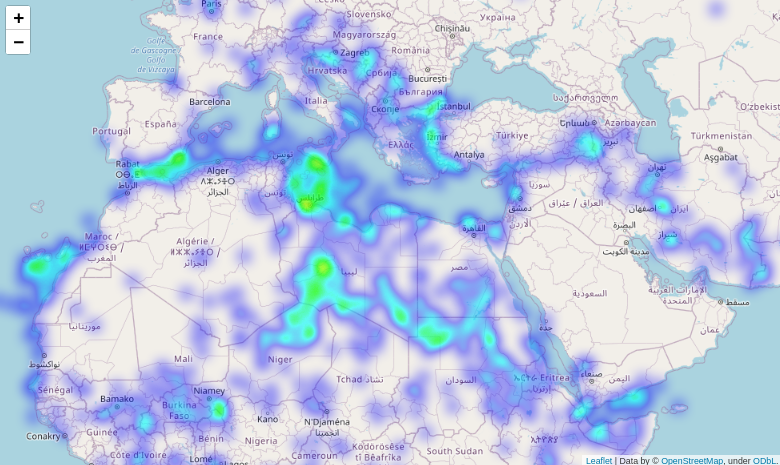

<h5><center>Heatmap of incidents in the Mediterranean and Northern Africa</center></h5>

The nation of Eritrea, up near the Horn of Africa, is host to a dying economy, overflowing prisons, and a mad dictator. Eritreans live in conditions of marginal rainfall and war. Consider the story of Michael and Niyat. Michael slaved in Eritrea for 14 long years until one day he decided to give it all up. As part of their escape from Eritrea, Michael and Niyat paid smugglers to take them to Libya across the Sahara Desert. They were eventually held captive, beaten and pressured to raise money for additional payments for the final journey across the Mediterranean Sea. Ultimately, they were rescued by an Italian ship after spending five hours at sea.

Michael and Niyat said that what pushed them to take the gruelling journey was a search for safety and a better life for themselves and their baby.

The Mediterranean region has claimed over 20000 lives, a large number of whom are still missing to this day. The heatmap clearly demarcates where the dead are found. Many lose their lives crossing the Sahara desert, and many lose their lives in the Mediterranean sea. Interestingly, the bodies are found at the near shore of the sea implying that a lot of these migrants never come close to crossing the sea.

### They drown. They are murdered. They starve and they thirst.

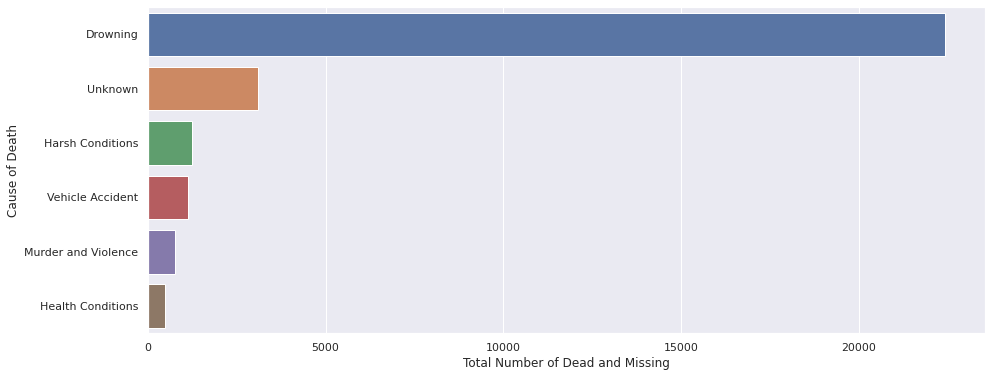

In [9]:
sns.barplot(data=cause_of_death, x='Total Number of Dead and Missing', y='Cause of Death')
sns.set(rc={'figure.figsize':(15, 5)})

Through Nigeria, Niger and Libya, Dante travelled to find safety in Lampedusa, Italy. He found himself trapped in Libya and lived in a container truck for two months with just one set of clothes, a mattress, a rug, and a piece of bread for daily sustenance. He escaped Libya in a rubber boat with a hundred other migrants, and was rescued over the Mediterranean sea on his way to Lampedusa. 

Risking death in the Mediterranean is the most viable option for a lot of migrants. Ghanaians migate by sea in search of jobs. Nigerians and the people of Chad and Ivory Coast migrate to flee conflict. Outbreaks of disease like Ebola too forces migrations.

Scores of human beings have migrated from the northern coasts of Africa and Turkey for safety and refuge in Europe.
Since 2014, the Mediterranean Sea has claimed the lives of more than 20000 migrants attempting to cross it. The figures also account for only the minimum number of deaths and missing cases of migrants attempting to cross the Mediterranean sea. Many ships have disappeared without a trace, and bodies of dead migrants do wash up on Libyan shores from time to time.

Reports claim that Greek authorities purposely abandon migrants in the middle of the sea. This comes in the wake of increased claims from migrants and advocates that Greek authorities push back people migrating to Greece through the Mediterranean.

Others lose their lives in vehicular accidents, are murdered, or find themselves dying from hunger, thirst and exposure. For many, their cause of death is hard to determine.







### The crisis is worsening as the years go by.

<AxesSubplot:xlabel='Year', ylabel='Number of Incidents'>

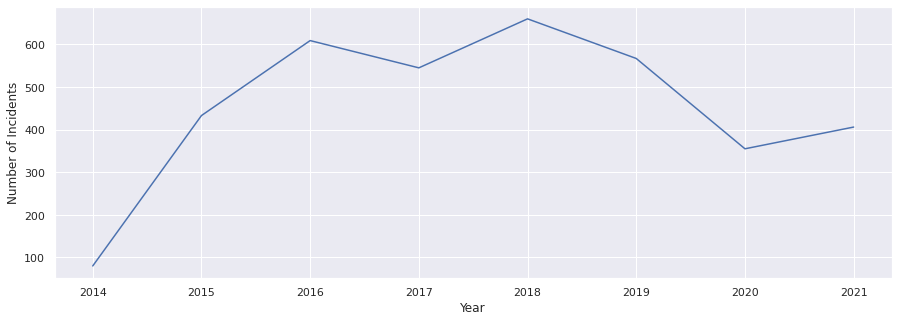

In [10]:
sns.lineplot(data=yearwise_incident, x='Year', y='Number of Incidents')

### space for analysis

### Damned are those who make their way across the seas of water and the seas of sand.

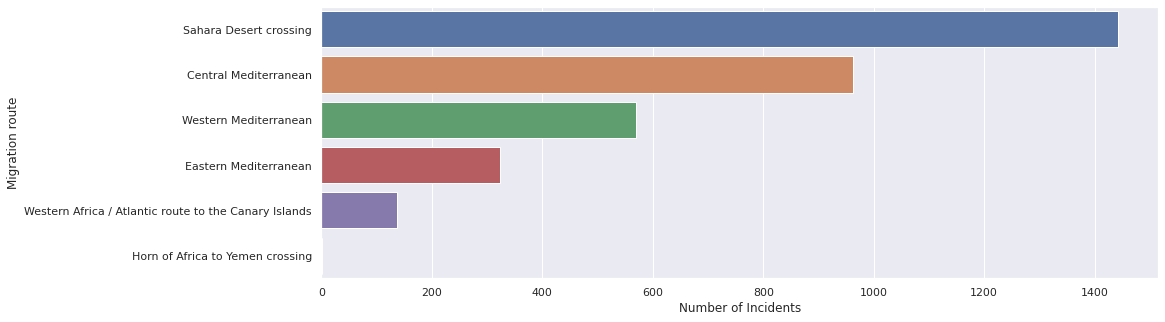

In [11]:
sns.barplot(data=regionwise_incident, x='Number of Incidents', y='Migration route')
sns.set(rc={'figure.figsize':(15, 5)})

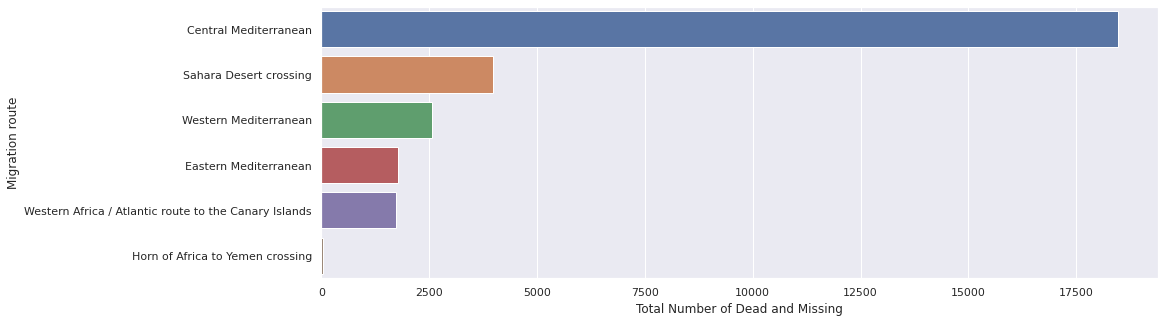

In [12]:
sns.barplot(data=regionwise_deaths, x='Total Number of Dead and Missing', y='Migration route')
sns.set(rc={'figure.figsize':(15, 5)})

### space for analysis